In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df_red = pd.read_csv("./dataset/winequality-red.csv", sep=';')
df_white = pd.read_csv("./dataset/winequality-white.csv", sep=';')
dataframes = [df_red, df_white]

df = pd.concat(dataframes)

In [10]:
df.shape

(6497, 12)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.isnull().values.any()

False

In [20]:
def plot_corr(df, size=25):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

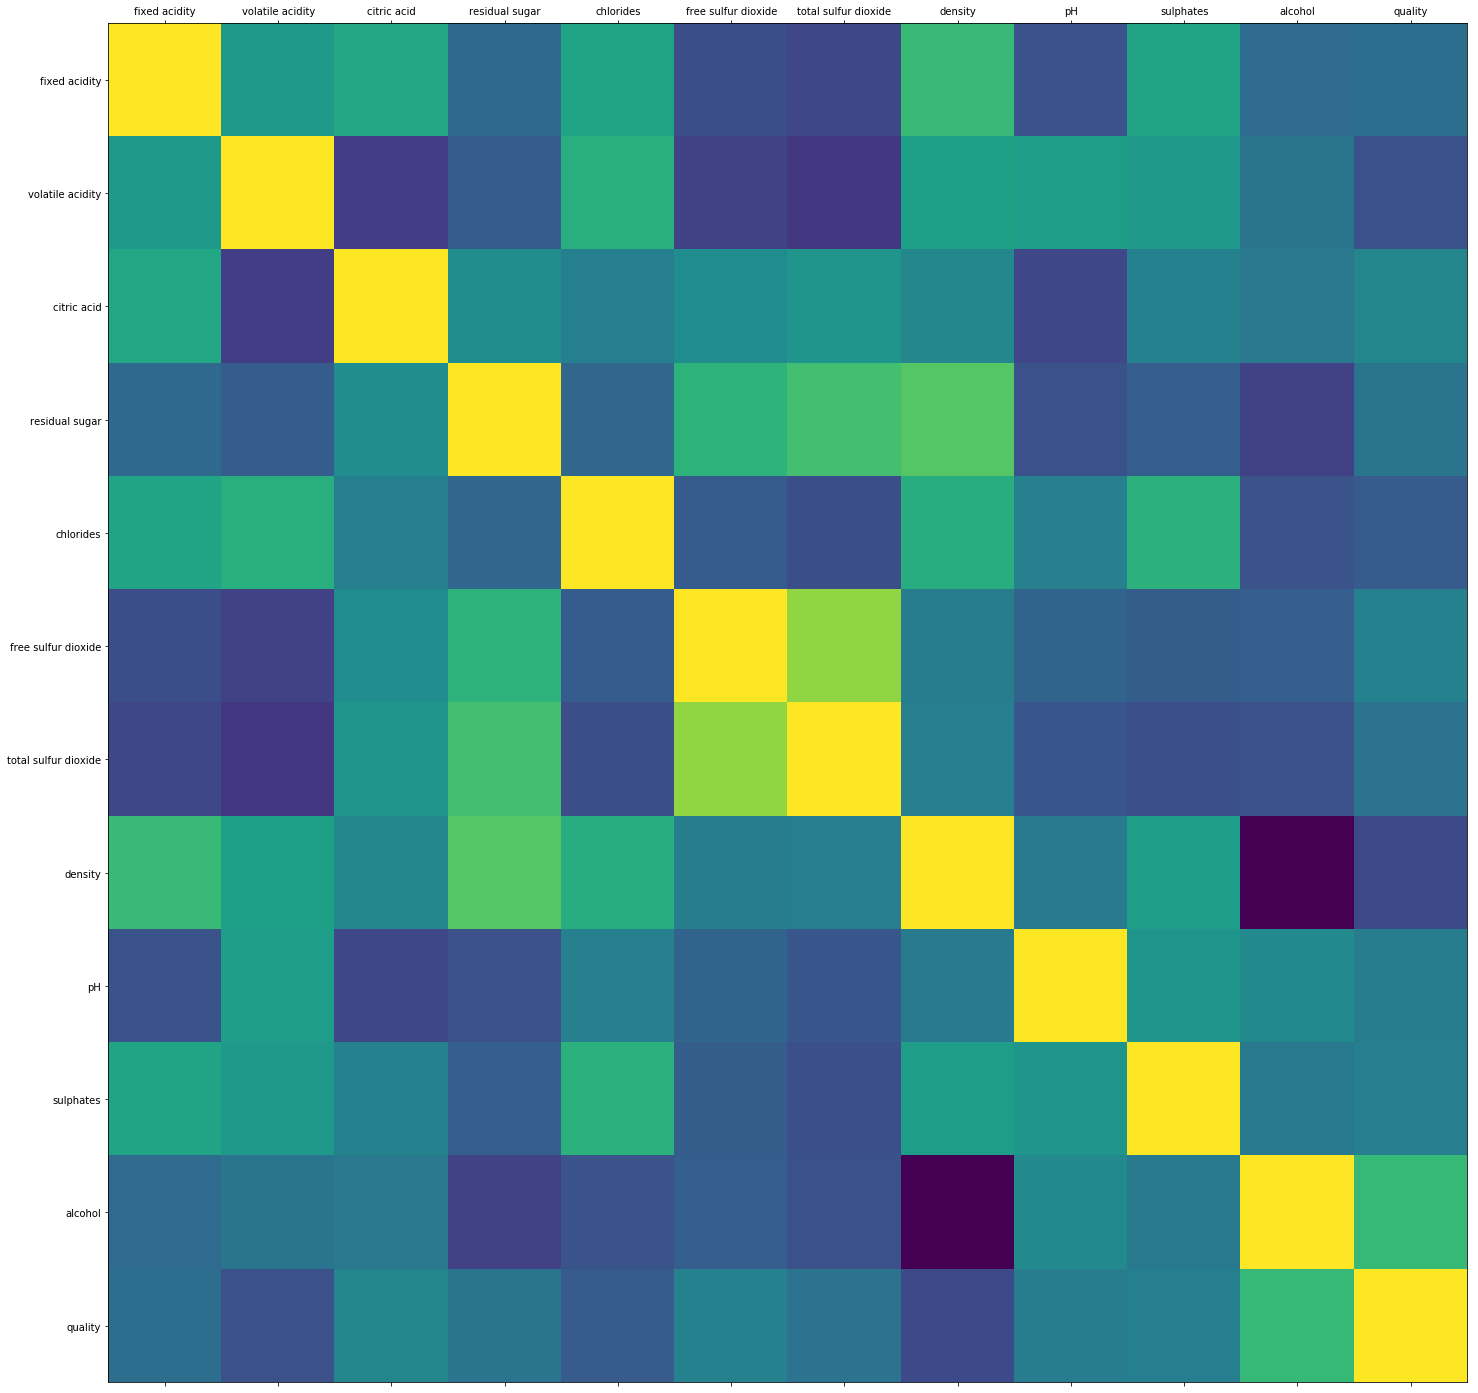

In [21]:
plot_corr(df)

In [22]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


## Eu deveria verificar a porcentagem de cada classe para melhor análise

In [30]:
from sklearn.model_selection import train_test_split

feature_columns =  df.columns.tolist()
del feature_columns[11]
feature_columns

class_column = ['quality']

In [31]:
x = df[feature_columns].values
y = df[class_column].values

split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = split_test_size, random_state=42)

In [32]:
print("{0:0.2f}% in traning set".format(len(x_train)/len(df.index) * 100))
print("{0:0.2f}% in test set".format(len(x_test)/len(df.index) * 100))

69.99% in traning set
30.01% in test set


## Eu deveria verificar a porcentagem pós split para analisar se separou da forma esperada

In [33]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
nb_predict_train = model.predict(x_train)

from sklearn import metrics

print("Accuracy percentage: {0:0.4f}%".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy percentage: 0.4698%


In [41]:
from sklearn.model_selection import cross_validate

scores = cross_validate(model, x_train, y_train.ravel(), cv=10, scoring=['accuracy','f1_macro','f1_weighted'], return_train_score=True)
scores
scores_df = pd.DataFrame(scores)
scores_df
scores_df.mean() * 100

C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users

fit_time              0.109596
score_time            0.139241
test_accuracy        45.852206
train_accuracy       46.709961
test_f1_macro        25.913818
train_f1_macro       29.465119
test_f1_weighted     45.310977
train_f1_weighted    46.188763
dtype: float64

In [42]:
predict_5 = [7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4]
model.predict([predict_5])

array([4], dtype=int64)